In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
import seaborn as sns

In [2]:
import xlrd
import csv

def csv_from_excel():
    wb = xlrd.open_workbook('-Modified-ARM.xlsx')
    sh = wb.sheet_by_name('Task')
    your_csv_file = open('Data.csv', 'w')
    wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    your_csv_file.close()

# runs the csv_from_excel function:
csv_from_excel()

In [3]:
dataset = pd.read_csv('Data.csv')

In [4]:
dataset

,Deliverables,Sub Task ID,Task ID,Task Type,Task Name,Description/Detail,Priority,Estimated Start Date,Estimated Completion Date,Actual Completion Date,...,44021.0,44022.0,44023.0,44024.0,44025.0,44026.0,44027.0,44028.0,44029.0,44030.0
0,02Hyd06FS,1.1,02Hyd06FS_1.1,Design/Analysis/Annexes,Penstock Thickness Check,Thickness Calculation Revision as per Khem SIr...,Urg&Imp,43976.0,43976.0,43976.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02Hyd06FS,1.2,02Hyd06FS_1.2,Drawings,Tender Drawings Update,"HM Drawings Update, Thickness and Groove Updat...",Urg&Not-Imp,43976.0,43976.0,43976.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02Hyd04FS,1.3,02Hyd04FS_1.3,Report Writing,Update of Tender Documents,Changes as per HM Drawings Update,Urg&Imp,43977.0,43977.0,43977.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02Hyd05FS,1.4,02Hyd05FS_1.4,Report Writing,Update of Tender Documents,Changes as per HM Drawings Update,Urg&Imp,43977.0,43977.0,43977.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02Hyd06FS,1.5,02Hyd06FS_1.5,Report Writing,Update of Tender Documents,Changes as per HM Drawings Update,Urg&Imp,43977.0,43977.0,43977.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,NaN,NaN,_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1059,NaN,NaN,_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1060,NaN,NaN,_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,NaN,NaN,_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset = dataset.iloc[:, [3,6,10,11,13]]

In [6]:
dataset

,Task Type,Priority,Status,Assign To,Actual Person Hr
0,Design/Analysis/Annexes,Urg&Imp,Complete,Ishwar Dahal,3.0
1,Drawings,Urg&Not-Imp,Complete,Ishwar Dahal,4.0
2,Report Writing,Urg&Imp,Complete,Ishwar Dahal,3.0
3,Report Writing,Urg&Imp,Complete,Ishwar Dahal,2.0
4,Report Writing,Urg&Imp,Complete,Ishwar Dahal,1.0
...,...,...,...,...,...
1058,NaN,NaN,NaN,NaN,0.0
1059,NaN,NaN,NaN,NaN,0.0
1060,NaN,NaN,NaN,NaN,0.0
1061,NaN,NaN,NaN,NaN,0.0


In [7]:
dataset = dataset.dropna(axis=0, subset=['Task Type','Priority','Status','Assign To','Actual Person Hr'])

In [8]:
dataset

,Task Type,Priority,Status,Assign To,Actual Person Hr
0,Design/Analysis/Annexes,Urg&Imp,Complete,Ishwar Dahal,3.0
1,Drawings,Urg&Not-Imp,Complete,Ishwar Dahal,4.0
2,Report Writing,Urg&Imp,Complete,Ishwar Dahal,3.0
3,Report Writing,Urg&Imp,Complete,Ishwar Dahal,2.0
4,Report Writing,Urg&Imp,Complete,Ishwar Dahal,1.0
...,...,...,...,...,...
96,Review,Urg&Imp,Complete,Ishwar Dahal,1.0
99,Review,Urg&Imp,Complete,Ishwar Dahal,7.0
101,Review,Imp&Not-Urg,Complete,Ishwar Dahal,1.0
102,Review,Urg&Imp,In Progress,Ishwar Dahal,1.0


In [9]:
mark_array=dataset.values

In [10]:
mark_array[:, 4] = mark_array[:, 4].astype(float)

In [11]:
mark_array

array([['Design/Analysis/Annexes', 'Urg&Imp', 'Complete', 'Ishwar Dahal',
        3.0],
       ['Drawings', 'Urg&Not-Imp', 'Complete', 'Ishwar Dahal', 4.0],
       ['Report Writing', 'Urg&Imp', 'Complete', 'Ishwar Dahal', 3.0],
       ['Report Writing', 'Urg&Imp', 'Complete', 'Ishwar Dahal', 2.0],
       ['Report Writing', 'Urg&Imp', 'Complete', 'Ishwar Dahal', 1.0],
       ['Report Writing', 'Urg&Imp', 'Complete', 'Ishwar Dahal', 2.0],
       ['Report Writing', 'Urg&Imp', 'Complete', 'Ishwar Dahal', 1.0],
       ['Report Writing', 'Urg&Imp', 'Complete', 'Ishwar Dahal', 5.0],
       ['Review', 'Imp&Not-Urg', 'Complete', 'Ishwar Dahal', 7.0],
       ['Design/Analysis/Annexes', 'Urg&Imp', 'Complete', 'Ishwar Dahal',
        3.0],
       ['Design/Analysis/Annexes', 'Urg&Imp', 'In Progress',
        'Ishwar Dahal', 4.0],
       ['Review', 'Urg&Imp', 'Complete', 'Ishwar Dahal', 7.0],
       ['Review', 'Urg&Imp', 'In Progress', 'Ishwar Dahal', 7.0],
       ['Drawings', 'Urg&Imp', 'Sent for E

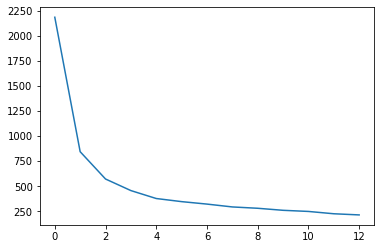

In [12]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,14)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(mark_array, categorical=[0,1,2,3])
    cost.append(kproto.cost_)
    
plt.plot(cost)

In [13]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 2, 3])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 6, ncost: 580.9159282351832
Run: 1, iteration: 2/20, moves: 0, ncost: 580.9159282351832
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 14, ncost: 595.5513427550956
Run: 2, iteration: 2/20, moves: 2, ncost: 594.8351898389611
Run: 2, iteration: 3/20, moves: 0, ncost: 594.8351898389611
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 4, ncost: 570.5392609264776
Run: 3, iteration: 2/20, moves: 0, ncost: 570.5392609264776
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 22, ncost: 637.5001350662752
Run: 4, iteration: 2/20, moves: 10, ncost: 595.005374780461
Run: 4, iteration: 3/20, moves: 1, ncost: 594.8351898389614
Run: 4, iteration: 4/20, moves: 0, ncost: 594.8351898389614
Init: initializing

In [14]:
print(kproto.cluster_centroids_)

[array([[16.18181818],
       [ 3.1       ],
       [ 7.17241379]]), array([['Drawings', 'Urg&Imp', 'Complete', 'Sanish Maharjan'],
       ['Drawings', 'Urg&Imp', 'Complete', 'Ishwar Dahal'],
       ['Drawings', 'Urg&Imp', 'Complete', 'Surendra Shrestha']],
      dtype='<U17')]


In [15]:
# Checking the cost of the clusters created.
kproto.cost_

570.5392609264776

In [16]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [17]:
cluster_dict

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1]

In [18]:
dataset['cluster']=cluster_dict

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
dataset

,Task Type,Priority,Status,Assign To,Actual Person Hr,cluster
0,Design/Analysis/Annexes,Urg&Imp,Complete,Ishwar Dahal,3.0,1
1,Drawings,Urg&Not-Imp,Complete,Ishwar Dahal,4.0,1
2,Report Writing,Urg&Imp,Complete,Ishwar Dahal,3.0,1
3,Report Writing,Urg&Imp,Complete,Ishwar Dahal,2.0,1
4,Report Writing,Urg&Imp,Complete,Ishwar Dahal,1.0,1
...,...,...,...,...,...,...
96,Review,Urg&Imp,Complete,Ishwar Dahal,1.0,1
99,Review,Urg&Imp,Complete,Ishwar Dahal,7.0,2
101,Review,Imp&Not-Urg,Complete,Ishwar Dahal,1.0,1
102,Review,Urg&Imp,In Progress,Ishwar Dahal,1.0,1


In [20]:
dataset[dataset['cluster']== 0]

,Task Type,Priority,Status,Assign To,Actual Person Hr,cluster
13,Drawings,Urg&Imp,Sent for External Review,Kabita Shrestha,15.0,0
14,Drawings,Urg&Imp,Stopped,Kabita Shrestha,14.5,0
30,Drawings,Urg&Imp,In Progress,Kabita Shrestha,22.0,0
32,Drawings,Urg&Imp,Complete,Sabita Chimouriya,16.0,0
36,Drawings,Urg&Imp,Complete,Sabita Chimouriya,14.0,0
41,Drawings,Urg&Imp,Complete,Sanish Maharjan,20.0,0
42,Drawings,Urg&Imp,In Progress,Sanish Maharjan,16.5,0
48,Drawings,Urg&Imp,Complete,Sabita Chimouriya,21.5,0
53,Drawings,Urg&Imp,Complete,Sanish Maharjan,13.5,0
64,Design/Analysis/Annexes,Urg&Imp,Complete,Surendra Shrestha,13.0,0


In [21]:
dataset[dataset['cluster']== 1]

,Task Type,Priority,Status,Assign To,Actual Person Hr,cluster
0,Design/Analysis/Annexes,Urg&Imp,Complete,Ishwar Dahal,3.0,1
1,Drawings,Urg&Not-Imp,Complete,Ishwar Dahal,4.0,1
2,Report Writing,Urg&Imp,Complete,Ishwar Dahal,3.0,1
3,Report Writing,Urg&Imp,Complete,Ishwar Dahal,2.0,1
4,Report Writing,Urg&Imp,Complete,Ishwar Dahal,1.0,1
5,Report Writing,Urg&Imp,Complete,Ishwar Dahal,2.0,1
6,Report Writing,Urg&Imp,Complete,Ishwar Dahal,1.0,1
7,Report Writing,Urg&Imp,Complete,Ishwar Dahal,5.0,1
9,Design/Analysis/Annexes,Urg&Imp,Complete,Ishwar Dahal,3.0,1
10,Design/Analysis/Annexes,Urg&Imp,In Progress,Ishwar Dahal,4.0,1


In [22]:
dataset[dataset['cluster']== 2]

,Task Type,Priority,Status,Assign To,Actual Person Hr,cluster
8,Review,Imp&Not-Urg,Complete,Ishwar Dahal,7.0,2
11,Review,Urg&Imp,Complete,Ishwar Dahal,7.0,2
12,Review,Urg&Imp,In Progress,Ishwar Dahal,7.0,2
22,Drawings,Urg&Imp,Complete,Kabita Shrestha,9.0,2
23,Drawings,Urg&Imp,Complete,Kabita Shrestha,6.0,2
24,Drawings,Urg&Imp,Complete,Kabita Shrestha,7.0,2
31,Drawings,Urg&Imp,Complete,Sabita Chimouriya,8.0,2
33,Drawings,Urg&Imp,Complete,Sabita Chimouriya,9.0,2
45,Drawings,Urg&Imp,Complete,Sabita Chimouriya,11.0,2
46,Drawings,Urg&Imp,Complete,Sabita Chimouriya,6.5,2


In [23]:
# Checking the clusters created
df = pd.DataFrame(dataset['cluster'].value_counts())
df

,cluster
1,50
2,29
0,11


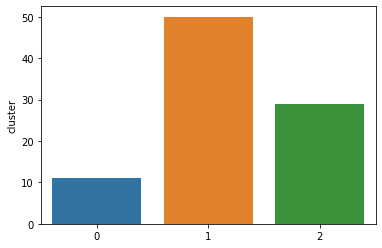

In [24]:
sns.barplot(x=df.index, y=df['cluster'])

In [25]:
employee_name=input("enter the employee's name")

enter the employee's nameIshwar Dahal


In [26]:
# retrieving rows by individual's name by loc method 
individual_rows=dataset.loc[dataset['Assign To'] == employee_name]
  
# checking data type of rows 
print(type(individual_rows)) 
  
# display 
individual_rows 

<class 'pandas.core.frame.DataFrame'>


,Task Type,Priority,Status,Assign To,Actual Person Hr,cluster
0,Design/Analysis/Annexes,Urg&Imp,Complete,Ishwar Dahal,3.0,1
1,Drawings,Urg&Not-Imp,Complete,Ishwar Dahal,4.0,1
2,Report Writing,Urg&Imp,Complete,Ishwar Dahal,3.0,1
3,Report Writing,Urg&Imp,Complete,Ishwar Dahal,2.0,1
4,Report Writing,Urg&Imp,Complete,Ishwar Dahal,1.0,1
5,Report Writing,Urg&Imp,Complete,Ishwar Dahal,2.0,1
6,Report Writing,Urg&Imp,Complete,Ishwar Dahal,1.0,1
7,Report Writing,Urg&Imp,Complete,Ishwar Dahal,5.0,1
8,Review,Imp&Not-Urg,Complete,Ishwar Dahal,7.0,2
9,Design/Analysis/Annexes,Urg&Imp,Complete,Ishwar Dahal,3.0,1


In [27]:
# Checking the clusters created for an individual
df_individual = pd.DataFrame(individual_rows['cluster'].value_counts())
df_individual

,cluster
1,18
2,7


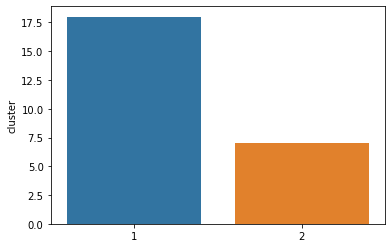

In [28]:
sns.barplot(x=df_individual.index, y=df_individual['cluster'])